<a href="https://colab.research.google.com/github/ajk22/ClassWork1/blob/master/DS200_Lab_10_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# As usual, load needed packages and methods
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
np.set_printoptions(threshold=50)
import folium

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


The Center for at Johns Hopkins University maintains a dashboard of coronavirus cases at https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6.  The data behind this dashboard are available at a GitHub repository that is updated regularly.
**It is extremely important to remember that this dataset, like all datasets, is only as good as the methodology used to compile it.  I encourage you to reflect on the many reasons this particular dataset is not accurate.** (You don't have to include these reflections in your writeup.)

In [2]:
# Read data from gitHub repository maintained by Johns Hopkins researchers
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
confirmed = Table.read_table(path+'confirmed_global.csv')
confirmed_US = Table.read_table(path+'confirmed_US.csv')
deaths = Table.read_table(path+'deaths_global.csv')
deaths_US = Table.read_table(path+'deaths_US.csv')
recovered = Table.read_table(path+'recovered_global.csv')

confirmed.show(5)

**Part 1.**  Before looking at the data, address the following questions:
* Visit http://cidd.psu.edu/ and view some of the "AskCIDD" videos.  **Insert a text box in which you describe two facts you did not know about coronavirus before watching the videos.**
* Read the article at https://medium.com/@noahhaber/flatten-the-curve-of-armchair-epidemiology-9aa8cf92d652.  **Insert a text box in which you explain how this humorous article has serious implications for the ethical use of data science.**

You're welcome to write at whatever length you feel is appropriate to adequately address the questions.  Roughly speaking, a sentence for each fact in part one and a few senteces for part two should be about right.


**AskCIDD Fact:**

1. Individuals who are higher in age are more likely to suffer from more severe symptoms of Covid-19
2. According to these videos, there are no known supplements which will reduce your chances of infection for Covid-19. It is unclear whether there are supplements which will reduce the severity of Covid-19 symptoms.

**Medium Article:**
This article has serious implications for the ethical use of data science because it is targeting misleading information and those who spread it. This article is implying that the majority of the information found online and on social media is misinformative, data scientists should be aware of this and must avoid adding to the cloud of misinformation as much as possible. Data scientist must be also be assured that the data which they are analyzing is not taken from a misinformative source.

**Part 2.**
Examine an case of exponential growth and use a least-squares line to estimate the growth rate

In [5]:
# Prepare the dataset
data = confirmed.to_df() # Convert to a dataframe object (in the "pandas" package) 
data = pd.DataFrame(data.groupby("Country/Region").agg("sum"))
data = data.drop(columns = ["Lat", "Long"])
data = data.transpose()
data = Table.from_df(data) # Convert back to a Table object (in the "datascience" package)
data = data.with_column("days since 1/22/20", list(range(data.num_rows)))
data

Afghanistan | Albania | Algeria | Andorra | Angola | Antigua and Barbuda | Argentina | Armenia | Australia | Austria | Azerbaijan | Bahamas | Bahrain | Bangladesh | Barbados | Belarus | Belgium | Belize | Benin | Bhutan | Bolivia | Bosnia and Herzegovina | Botswana | Brazil | Brunei | Bulgaria | Burkina Faso | Burma | Burundi | Cabo Verde | Cambodia | Cameroon | Canada | Central African Republic | Chad | Chile | China | Colombia | Comoros | Congo (Brazzaville) | Congo (Kinshasa) | Costa Rica | Cote d'Ivoire | Croatia | Cuba | Cyprus | Czechia | Denmark | Diamond Princess | Djibouti | Dominica | Dominican Republic | Ecuador | Egypt | El Salvador | Equatorial Guinea | Eritrea | Estonia | Eswatini | Ethiopia | Fiji | Finland | France | Gabon | Gambia | Georgia | Germany | Ghana | Greece | Grenada | Guatemala | Guinea | Guinea-Bissau | Guyana | Haiti | Holy See | Honduras | Hungary | Iceland | India | Indonesia | Iran | Iraq | Ireland | Israel | Italy | Jamaica | Japan | Jordan | Kazakhstan | Kenya | Korea, South | Kosovo | Kuwait | Kyrgyzstan | Laos | Latvia | Lebanon | Lesotho | Liberia | Libya | Liechtenstein | Lithuania | Luxembourg | MS Zaandam | Madagascar | Malawi | Malaysia | Maldives | Mali | Malta | Marshall Islands | Mauritania | Mauritius | Mexico | Micronesia | Moldova | Monaco | Mongolia | Montenegro | Morocco | Mozambique | Namibia | Nepal | Netherlands | New Zealand | Nicaragua | Niger | Nigeria | North Macedonia | Norway | Oman | Pakistan | Panama | Papua New Guinea | Paraguay | Peru | Philippines | Poland | Portugal | Qatar | Romania | Russia | Rwanda | Saint Kitts and Nevis | Saint Lucia | Saint Vincent and the Grenadines | Samoa | San Marino | Sao Tome and Principe | Saudi Arabia | Senegal | Serbia | Seychelles | Sierra Leone | Singapore | Slovakia | Slovenia | Solomon Islands | Somalia | South Africa | South Sudan | Spain | Sri Lanka | Sudan | Suriname | Sweden | Switzerland | Syria | Taiwan* | Tajikistan | Tanzania | Thailand | Timor-Leste | Togo | Trinidad and Tobago | Tunisia | Turkey | US   | Uganda | Ukraine | United Arab Emirates | United Kingdom | Uruguay | Uzbekistan | Vanuatu | Venezuela | Vietnam | West Bank and Gaza | Yemen | Zambia | Zimbabwe | days since 1/22/20
0           | 0       | 0       | 0       | 0      | 0                   | 0         | 0       | 0         | 0       | 0          | 0       | 0       | 0          | 0        | 0       | 0       | 0      | 0     | 0      | 0       | 0                      | 0        | 0      | 0      | 0        | 0            | 0     | 0       | 0          | 0        | 0        | 0      | 0                        | 0    | 0     | 548   | 0        | 0       | 0                   | 0                | 0          | 0             | 0       | 0    | 0      | 0       | 0       | 0                | 0        | 0        | 0                  | 0       | 0     | 0           | 0                 | 0       | 0       | 0        | 0        | 0    | 0       | 0      | 0     | 0      | 0       | 0       | 0     | 0      | 0       | 0         | 0      | 0             | 0      | 0     | 0        | 0        | 0       | 0       | 0     | 0         | 0    | 0    | 0       | 0      | 0     | 0       | 2     | 0      | 0          | 0     | 1            | 0      | 0      | 0          | 0    | 0      | 0       | 0       | 0       | 0     | 0             | 0         | 0          | 0          | 0          | 0      | 0        | 0        | 0    | 0     | 0                | 0          | 0         | 0      | 0          | 0       | 0      | 0        | 0          | 0       | 0          | 0       | 0     | 0           | 0           | 0         | 0     | 0       | 0               | 0      | 0    | 0        | 0      | 0                | 0        | 0    | 0           | 0      | 0        | 0     | 0       | 0      | 0      | 0                     | 0           | 0                                | 0     | 0          | 0                     | 0            | 0       | 0      | 0          | 0         

In [6]:
# Examine the US column.  (You might want to look at various other countries too.)
# Notice that all US entries are nonzero, which is important for later when we take the logarithm.
# If there were zeros, we could either start with a later date or add a small value (like 0.1) to each entry.
country = 'US'
data[country] 

array([       1,        1,        2, ..., 30609690, 30671844, 30706126])

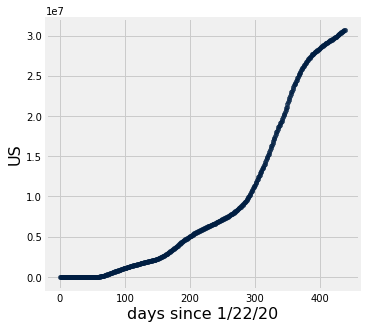

In [7]:
# Plot confirmed cases against time in days
data.scatter("days since 1/22/20", country)

The shape of the time series plot of confirmed cases above is characteristic of exponential growth.  One way to express an exponential growth curve is
$$ \mbox{cases at time $t$} = K \exp(rt),$$
where $K$ is the number of cases at time $t=0$ and $r$ is the exponential rate of growth.  If you take the natural logatirhm of both sides of this equation, you get 
$$ \log (\mbox{cases at time $t$}) = \log K + rt,$$
which is simply the equation for a line with slope equal to $r$ and intercept equal to $\log K$.  We'll exploit this fact by using a least-squares fit to these data to estimate the intercept and slope of the line relating $y=\log(\mbox{cases})$ to $x=\mbox{time}$.

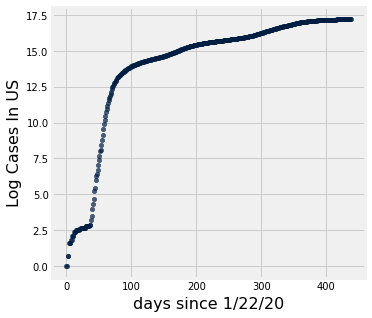

In [8]:
## Idea:  Use least squares as a way to fit a straight line (ignore the fact that regression assumptions not satisfied)
logCases = data.select('days since 1/22/20', country)
logCases = logCases.with_column('Log Cases In ' + country, np.log(logCases.column(country)))
logCases.scatter("days since 1/22/20", 'Log Cases In ' + country)

In [9]:
# Focus on the period from day 100 to day 400
subset = logCases.where('days since 1/22/20', are.between(100, 401)) # went to 401, because are.between's indexing conventions
subset.scatter("days since 1/22/20", 'Log Cases In ' + country)

In [10]:
# Use some of the functions defined in Chapter 15.  
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(table, x, y):
    x_in_standard_units = standard_units(table.column(x))
    y_in_standard_units = standard_units(table.column(y))
    return np.mean(x_in_standard_units * y_in_standard_units)

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) -  a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)


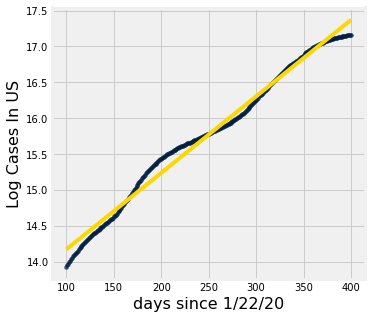

In [11]:
# What does the least squares line look like?
scatter_fit(subset, "days since 1/22/20", 'Log Cases In ' + country)

In [12]:
#Obtain the slope and intercept
r = slope(subset, "days since 1/22/20", 'Log Cases In ' + country)
logK = intercept(subset, "days since 1/22/20", 'Log Cases In ' + country)
(r, logK)

(0.010671721140202439, 13.10268836102415)

In [13]:
# Add a prediction column to the logCases table and the original data table
# For the logCases table, we can keep the predictions on the log scale
logCases = logCases.with_column('Log Predicted Cases', logK + r*logCases.column('days since 1/22/20'))
# For the data table, we exponentiate to give predictions on the original scale
data = data.with_column('Predicted Cases', np.exp(logK + r*logCases.column('days since 1/22/20')))

Next, we'll produce some visualizations of the observed and predicted values, both on the original scale and the log scale.

In [14]:
# If you invoke the "scatter" method using only a single column name, you'll get multiple scatterplots on the same set
# of axes using the single column as the horizontal scale.  So we can select three columns (2 Ys and 1 X) and then call "scatter":
(data.select('days since 1/22/20', country, 'Predicted Cases')
     .scatter('days since 1/22/20'))

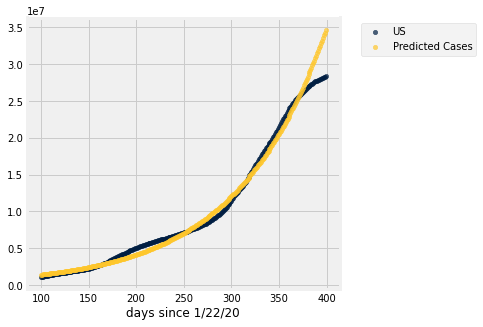

In [24]:
# We can focus on certain subplots to see better.  
# Experiment with the 'are.between' limits here to see how things change:
(data.select('days since 1/22/20', country, 'Predicted Cases')
     .where('days since 1/22/20', are.between(100,400))
     .scatter('days since 1/22/20'))

**Questions**

1.   Does the exponential curve fit using the data between 100 and 400 days do a good job of capturing the **entire** dataset? Explain.

2.   Make a similar scatterplot or scatterplots on the log scale using the `logCases` Table, that is, plot `Log Predicted Cases` and `Log Cases in US` from the `logCases` Table against `days since 1/22/20`. You can experiment with 'are.between' limits to zoom in on certian areas. What, if any, advantages or disadvantages are there to using the log scale here?

**Question 1:**
The exponential curve does a fairly good job at fitting the data between 100 and 400, however there are some differences between the actual data and the curve.

**100-200:**
In this range of the data, the beggining of the curve has relatively the same shape as the data however it is greater than the data. The data at the end of this range is greater than the curve has a much steeper shape than the exponential curve.

**200-300:**
In this range of the data, we will find that the shape of both curves cross over eachother. At the beginning of the range, the data is greater than the curve. At the end of the range, the data is less than the curve.

**300-400:**
In this range of the data, we find that the data and the curve have the very close to the same fit between the range of 300-380. However in the last 20 days of this range, the actual data is much greater than the curve.

**Question 2:**



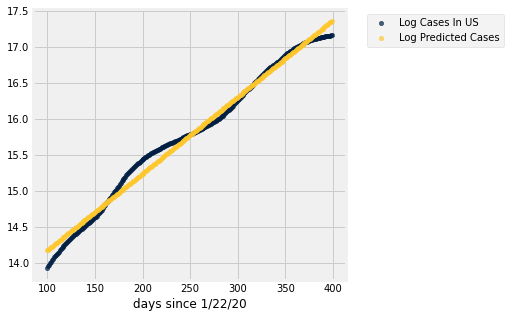

In [34]:
(logCases.select('days since 1/22/20', 'Log Cases In US', 'Log Predicted Cases')
     .where('days since 1/22/20', are.between(100,400))
     .scatter('days since 1/22/20'))

**Answer:** with a logarithmic scale we are able to more easily see the percentage changes in the data. In this example, the curve and the data are neither a better or worse fit than the other scatter plot. 

**Part 3** Use the original 'confirmed' Table to produce a map visualization that resembles the one at https://coronavirus.jhu.edu/map.html.  

In [51]:
# As a starting point, let's find out what the most recent day is
last_column_index = confirmed.num_columns - 1
confirmed.labels[last_column_index]

'4/4/21'

In [56]:
# In the code below, make sure to use the most recent date, found in the previous line. (You may lose credit if you use '4/1/20'.)
# Can you change the code to make this automatic?
recent_confirmed = (confirmed.select('Province/State', 'Country/Region', 'Lat', 'Long', '4/5/20')
                             .relabel('Province/State', 'Label1')
                             .relabel('Country/Region', 'Label2')
                             .relabel('4/5/20', 'Cases'))

recent_confirmed_US = (confirmed_US.select('Admin2', 'Province_State', 'Lat', 'Long_', '4/5/20')
                                   .relabel('Admin2', 'Label1')
                                   .relabel('Province_State', 'Label2')
                                   .relabel('Long_','Long')
                                   .relabel('4/5/20', 'Cases'))

(recent_confirmed.num_rows, recent_confirmed_US.num_rows) # How many rows in the two datasets?

(274, 3342)

In [57]:
# Add all of the US case summaries to the overall table
for i in np.arange(recent_confirmed_US.num_rows):
  recent_confirmed = recent_confirmed.with_row(recent_confirmed_US.row(i))

In [58]:
# Get rid of all rows where the count is zero.  Again, make sure you're using the most recent day.
recent_confirmed = recent_confirmed.where('Cases', are.above(0))
# Get rid of row for entire US country since we have added information on individual cities in the US
recent_confirmed = recent_confirmed.where('Label2', are.not_equal_to('US'))

In [59]:
recent_confirmed.num_rows # How many rows are left in the combined dataset?

2704

In [60]:
recent_confirmed.show(5)

**Now adapt the folium package code you've used previously to produce your map.** I recommend looking at the map produced in the bike sharing lab , Lab 5, for some guidance. Some potentially helpful ideas for using the 'Circle' method for folium:
* Using 'weight=0' will eliminate the border of the circles, which might make things easier to see.
* For circle radius, instead of the square root of number of cases, you might try the logarithm of number of cases (you can use 'np.log') since this results in a smaller range of circle sizes.  You might play around with other ideas, such as defining a fixed set of circle radii according to some range of case numbers you define yourself (this appears to be what the Hopkins group has done).
* You will definitely need to experiment with the multiplier you use for your circle radii.  Keep in mind that the radius units for folium.Circle are meters, and on a map of the world your circles will have to be thousands of meters wide to be visible.
* You can set 'fill_color' and 'fill_opacity' (the default of opacity is 20%) if you use 'fill=True', which I recommend.
* Don't forget you can include text for a popup with each marker.  For instance, in the final line of code below I will add a column called "popup" that makes a simple string with location and case number information.  Make sure to follow the bike sharing lab example if you want to use this column. This is not necessary, but would be a nice addition to your map.


In [61]:
# In case you want to use a 'popup' column in constructing your map, here is an example:
popup_text_column = make_array()
for i in np.arange(recent_confirmed.num_rows):
  text = (recent_confirmed.column('Label2')[i] + ': ' +
         str(recent_confirmed.column('Cases')[i]) + ' cases')
  if (recent_confirmed.column('Label1')[i] != 'nan'):
    text = recent_confirmed.column('Label1')[i] + ', ' + text
  popup_text_column = np.append(popup_text_column, text)

recent_confirmed = recent_confirmed.with_column('popup', popup_text_column)
recent_confirmed

Label1                       | Label2              | Lat      | Long     | Cases | popup
nan                          | Afghanistan         | 33.9391  | 67.71    | 338   | Afghanistan: 338 cases
nan                          | Albania             | 41.1533  | 20.1683  | 361   | Albania: 361 cases
nan                          | Algeria             | 28.0339  | 1.6596   | 1320  | Algeria: 1320 cases
nan                          | Andorra             | 42.5063  | 1.5218   | 501   | Andorra: 501 cases
nan                          | Angola              | -11.2027 | 17.8739  | 14    | Angola: 14 cases
nan                          | Antigua and Barbuda | 17.0608  | -61.7964 | 15    | Antigua and Barbuda: 15 cases
nan                          | Argentina           | -38.4161 | -63.6167 | 1451  | Argentina: 1451 cases
nan                          | Armenia             | 40.0691  | 45.0382  | 822   | Armenia: 822 cases
Australian Capital Territory | Australia           | -35.4735 | 149.012  | 96    | Australian Capital Territory, Australia: 96 cases
New South Wales              | Australia           | -33.8688 | 151.209  | 2580  | New South Wales, Australia: 2580 cases
... (2694 rows omitted)

In [100]:
CovidMap = folium.Map(location = [0, 0], width = '40%', height = '50%', zoom_start= 1)

for i in np.arange(recent_confirmed.num_rows):
  folium.Circle([recent_confirmed.column('Lat')[i], 
                 recent_confirmed.column('Long')[i]], 
                popup=recent_confirmed.column('popup')[i],
                opacity=.5,
                weight=0,
                radius=recent_confirmed.column('area')[i],
                fill=True).add_to(CovidMap)

CovidMap

In [98]:
multiplier = 80000
rad = np.log(recent_confirmed.column('Cases')) # Take the square root of counts
recent_confirmed = recent_confirmed.with_column('area', rad * multiplier) 
recent_confirmed.show(10)